In [8]:
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# to not display the warnings of tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

look_back = 7
epochs = 1000
batch_size = 32

np.random.seed(7)

from google.colab import files
uploaded = files.upload()

Saving ZEEL.csv to ZEEL.csv


In [0]:
zeel =  pd.read_csv('ZEEL.csv', header=0)
zeel=zeel.fillna(zeel.mean())
zeel_stock_prices = zeel.close.values.astype('float32')
zeel_stock_prices = zeel_stock_prices.reshape(len(zeel_stock_prices), 1)

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
zeel_stock_prices = scaler.fit_transform(zeel_stock_prices)

In [13]:
train_size = int(len(zeel_stock_prices) * 0.86)
test_size = len(zeel_stock_prices) - train_size
train, test = zeel_stock_prices[0:train_size,:], zeel_stock_prices[train_size:len(zeel_stock_prices),:]

print('Split data into training set and test set... Number of training samples/ test samples:', len(train), len(test))

Split data into training set and test set... Number of training samples/ test samples: 3355 547


In [0]:
# convert an array of values into a time series dataset 
# in form 
#                     X                     Y
# t-look_back+1, t-look_back+2, ..., t     t+1
#0 is axis it it becomes horizontal array , taking past 7 days data and predicting 8th day data

def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]         
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [0]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=epochs, batch_size=batch_size)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1000
3347/3347 [==============================] - 1s 330us/step - loss: 0.0154
Epoch 2/1000
3347/3347 [==============================] - 1s 184us/step - loss: 0.0028
Epoch 3/1000
3347/3347 [==============================] - 1s 180us/step - loss: 9.2475e-04
Epoch 4/1000
3347/3347 [==============================] - 1s 182us/step - loss: 8.6444e-04
Epoch 5/1000
3347/3347 [==============================] - 1s 176us/step - loss: 8.3033e-04
Epoch 6/1000
3347/3347 [==============================] - 1s 165us/step - loss: 8.1086e-04
Epoch 7/1000
3347/3347 [==============================] - 1s 169us/step - loss: 7.9827e-04
Epoch 8/1000
3347/3347 [==============================] - 1s 163us/step - loss: 7.9042e-04
Epoch 9/1000
3347/3347 [==============================] - 1s 166us/step - loss: 7.8522e-04
Epoch 10/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.8360e-04
Epoch 11/1000
3347/3347 [==============================] - 1s 166us/step - loss: 7.8043e-04
Epoch

3347/3347 [==============================] - 1s 163us/step - loss: 7.7993e-04
Epoch 14/1000
3347/3347 [==============================] - 1s 171us/step - loss: 7.7723e-04
Epoch 15/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.7573e-04
Epoch 16/1000
3347/3347 [==============================] - 1s 170us/step - loss: 7.7392e-04
Epoch 17/1000
3347/3347 [==============================] - 1s 169us/step - loss: 7.7639e-04
Epoch 18/1000
3347/3347 [==============================] - 1s 173us/step - loss: 7.7391e-04
Epoch 19/1000
3347/3347 [==============================] - 1s 171us/step - loss: 7.7192e-04
Epoch 20/1000
3347/3347 [==============================] - 1s 192us/step - loss: 7.7734e-04
Epoch 21/1000
3347/3347 [==============================] - 1s 172us/step - loss: 7.7456e-04
Epoch 22/1000
3347/3347 [==============================] - 1s 171us/step - loss: 7.7351e-04
Epoch 23/1000
3347/3347 [==============================] - 1s 174us/step - loss: 7.7119e-04
Ep

Epoch 26/1000
3347/3347 [==============================] - 1s 168us/step - loss: 7.6977e-04
Epoch 27/1000
3347/3347 [==============================] - 1s 171us/step - loss: 7.7514e-04
Epoch 28/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.7122e-04
Epoch 29/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.6591e-04
Epoch 30/1000
3347/3347 [==============================] - 1s 170us/step - loss: 7.6993e-04
Epoch 31/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.7338e-04
Epoch 32/1000
3347/3347 [==============================] - 1s 166us/step - loss: 7.6408e-04
Epoch 33/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.6708e-04
Epoch 34/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.6821e-04
Epoch 35/1000
3347/3347 [==============================] - 1s 163us/step - loss: 7.6706e-04
Epoch 36/1000
3347/3347 [==============================] - 1s 168us/step - loss:

3347/3347 [==============================] - 1s 164us/step - loss: 7.6369e-04
Epoch 39/1000
3347/3347 [==============================] - 1s 160us/step - loss: 7.6299e-04
Epoch 40/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.6528e-04
Epoch 41/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.6253e-04
Epoch 42/1000
3347/3347 [==============================] - 1s 162us/step - loss: 7.6304e-04
Epoch 43/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.6759e-04
Epoch 44/1000
3347/3347 [==============================] - 1s 169us/step - loss: 7.6236e-04
Epoch 45/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.6103e-04
Epoch 46/1000
3347/3347 [==============================] - 1s 162us/step - loss: 7.7282e-04
Epoch 47/1000
3347/3347 [==============================] - 1s 163us/step - loss: 7.6030e-04
Epoch 48/1000
3347/3347 [==============================] - 1s 162us/step - loss: 7.5582e-04
Ep

3347/3347 [==============================] - 1s 154us/step - loss: 7.5763e-04
Epoch 52/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.5932e-04
Epoch 53/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.5881e-04
Epoch 54/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.5872e-04
Epoch 55/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.5706e-04
Epoch 56/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.5874e-04
Epoch 57/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.5572e-04
Epoch 58/1000
3347/3347 [==============================] - 1s 168us/step - loss: 7.5844e-04
Epoch 59/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.5675e-04
Epoch 60/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.5774e-04
Epoch 61/1000
3347/3347 [==============================] - 1s 162us/step - loss: 7.5772e-04
Ep

3347/3347 [==============================] - 1s 179us/step - loss: 7.6569e-04
Epoch 65/1000
3347/3347 [==============================] - 1s 178us/step - loss: 7.5625e-04
Epoch 66/1000
3347/3347 [==============================] - 1s 179us/step - loss: 7.6204e-04
Epoch 67/1000
3347/3347 [==============================] - 1s 181us/step - loss: 7.5551e-04
Epoch 68/1000
3347/3347 [==============================] - 1s 174us/step - loss: 7.5659e-04
Epoch 69/1000
3347/3347 [==============================] - 1s 180us/step - loss: 7.6332e-04
Epoch 70/1000
3347/3347 [==============================] - 1s 176us/step - loss: 7.5074e-04
Epoch 71/1000
3347/3347 [==============================] - 1s 180us/step - loss: 7.5526e-04
Epoch 72/1000
3347/3347 [==============================] - 1s 180us/step - loss: 7.5745e-04
Epoch 73/1000
3347/3347 [==============================] - 1s 182us/step - loss: 7.5567e-04
Epoch 74/1000
3347/3347 [==============================] - 1s 177us/step - loss: 7.5646e-04
Ep

3347/3347 [==============================] - 1s 182us/step - loss: 7.5434e-04
Epoch 77/1000
3347/3347 [==============================] - 1s 176us/step - loss: 7.5504e-04
Epoch 78/1000
3347/3347 [==============================] - 1s 178us/step - loss: 7.5340e-04
Epoch 79/1000
3347/3347 [==============================] - 1s 182us/step - loss: 7.5444e-04
Epoch 80/1000
3347/3347 [==============================] - 1s 176us/step - loss: 7.5193e-04
Epoch 81/1000
3347/3347 [==============================] - 1s 183us/step - loss: 7.5085e-04
Epoch 82/1000
3347/3347 [==============================] - 1s 180us/step - loss: 7.5819e-04
Epoch 83/1000
3347/3347 [==============================] - 1s 176us/step - loss: 7.5352e-04
Epoch 84/1000
3347/3347 [==============================] - 1s 180us/step - loss: 7.5257e-04
Epoch 85/1000
3347/3347 [==============================] - 1s 179us/step - loss: 7.5441e-04
Epoch 86/1000
3347/3347 [==============================] - 1s 176us/step - loss: 7.5663e-04
Ep

3347/3347 [==============================] - 1s 178us/step - loss: 7.6079e-04
Epoch 89/1000
3347/3347 [==============================] - 1s 172us/step - loss: 7.5278e-04
Epoch 90/1000
3347/3347 [==============================] - 1s 180us/step - loss: 7.5535e-04
Epoch 91/1000
3347/3347 [==============================] - 1s 175us/step - loss: 7.5965e-04
Epoch 92/1000
3347/3347 [==============================] - 1s 180us/step - loss: 7.5544e-04
Epoch 93/1000
3347/3347 [==============================] - 1s 180us/step - loss: 7.5130e-04
Epoch 94/1000
3347/3347 [==============================] - 1s 183us/step - loss: 7.5269e-04
Epoch 95/1000
3347/3347 [==============================] - 1s 175us/step - loss: 7.5563e-04
Epoch 96/1000
3347/3347 [==============================] - 1s 176us/step - loss: 7.5888e-04
Epoch 97/1000
3347/3347 [==============================] - 1s 175us/step - loss: 7.5430e-04
Epoch 98/1000
3347/3347 [==============================] - 1s 173us/step - loss: 7.5084e-04
Ep

3347/3347 [==============================] - 1s 173us/step - loss: 7.5043e-04
Epoch 101/1000
3347/3347 [==============================] - 1s 172us/step - loss: 7.6112e-04
Epoch 102/1000
3347/3347 [==============================] - 1s 171us/step - loss: 7.5565e-04
Epoch 103/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.5473e-04
Epoch 104/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.5468e-04
Epoch 105/1000
3347/3347 [==============================] - 1s 177us/step - loss: 7.5959e-04
Epoch 106/1000
3347/3347 [==============================] - 1s 168us/step - loss: 7.5480e-04
Epoch 107/1000
3347/3347 [==============================] - 1s 166us/step - loss: 7.5073e-04
Epoch 108/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.5155e-04
Epoch 109/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.4964e-04
Epoch 110/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.5

Epoch 113/1000
3347/3347 [==============================] - 1s 180us/step - loss: 7.5140e-04
Epoch 114/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.5376e-04
Epoch 115/1000
3347/3347 [==============================] - 1s 172us/step - loss: 7.5281e-04
Epoch 116/1000
3347/3347 [==============================] - 1s 173us/step - loss: 7.4862e-04
Epoch 117/1000
3347/3347 [==============================] - 1s 163us/step - loss: 7.4835e-04
Epoch 118/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.5179e-04
Epoch 119/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.5680e-04
Epoch 120/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.4816e-04
Epoch 121/1000
3347/3347 [==============================] - 1s 172us/step - loss: 7.4861e-04
Epoch 122/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.4927e-04
Epoch 123/1000
3347/3347 [==============================] - 1s 168us/s

3347/3347 [==============================] - 1s 167us/step - loss: 7.5157e-04
Epoch 126/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.5092e-04
Epoch 127/1000
3347/3347 [==============================] - 1s 163us/step - loss: 7.4882e-04
Epoch 128/1000
3347/3347 [==============================] - 1s 163us/step - loss: 7.5179e-04
Epoch 129/1000
3347/3347 [==============================] - 1s 162us/step - loss: 7.5109e-04
Epoch 130/1000
3347/3347 [==============================] - 1s 158us/step - loss: 7.5488e-04
Epoch 131/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.4606e-04
Epoch 132/1000
3347/3347 [==============================] - 1s 153us/step - loss: 7.4710e-04
Epoch 133/1000
3347/3347 [==============================] - 1s 160us/step - loss: 7.5289e-04
Epoch 134/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.4691e-04
Epoch 135/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.5

3347/3347 [==============================] - 1s 167us/step - loss: 7.4551e-04
Epoch 139/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.5139e-04
Epoch 140/1000
3347/3347 [==============================] - 1s 168us/step - loss: 7.4789e-04
Epoch 141/1000
3347/3347 [==============================] - 1s 170us/step - loss: 7.5322e-04
Epoch 142/1000
3347/3347 [==============================] - 1s 166us/step - loss: 7.4711e-04
Epoch 143/1000
3347/3347 [==============================] - 1s 158us/step - loss: 7.5314e-04
Epoch 144/1000
3347/3347 [==============================] - 1s 160us/step - loss: 7.4879e-04
Epoch 145/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.4946e-04
Epoch 146/1000
3347/3347 [==============================] - 1s 168us/step - loss: 7.4779e-04
Epoch 147/1000
3347/3347 [==============================] - 1s 171us/step - loss: 7.4677e-04
Epoch 148/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.4

3347/3347 [==============================] - 1s 166us/step - loss: 7.4683e-04
Epoch 152/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.4629e-04
Epoch 153/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.4345e-04
Epoch 154/1000
3347/3347 [==============================] - 1s 169us/step - loss: 7.5080e-04
Epoch 155/1000
3347/3347 [==============================] - 1s 166us/step - loss: 7.4403e-04
Epoch 156/1000
3347/3347 [==============================] - 1s 162us/step - loss: 7.4488e-04
Epoch 157/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.4292e-04
Epoch 158/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.4377e-04
Epoch 159/1000
3347/3347 [==============================] - 1s 170us/step - loss: 7.4395e-04
Epoch 160/1000
3347/3347 [==============================] - 1s 168us/step - loss: 7.4909e-04
Epoch 161/1000
3347/3347 [==============================] - 1s 174us/step - loss: 7.4

Epoch 164/1000
3347/3347 [==============================] - 1s 173us/step - loss: 7.4578e-04
Epoch 165/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.4415e-04
Epoch 166/1000
3347/3347 [==============================] - 1s 170us/step - loss: 7.4241e-04
Epoch 167/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.4238e-04
Epoch 168/1000
3347/3347 [==============================] - 1s 170us/step - loss: 7.4767e-04
Epoch 169/1000
3347/3347 [==============================] - 1s 170us/step - loss: 7.4544e-04
Epoch 170/1000
3347/3347 [==============================] - 1s 171us/step - loss: 7.4109e-04
Epoch 171/1000
3347/3347 [==============================] - 1s 178us/step - loss: 7.4438e-04
Epoch 172/1000
3347/3347 [==============================] - 1s 172us/step - loss: 7.3990e-04
Epoch 173/1000
3347/3347 [==============================] - 1s 171us/step - loss: 7.4646e-04
Epoch 174/1000
3347/3347 [==============================] - 1s 175us/s

3347/3347 [==============================] - 1s 157us/step - loss: 7.4090e-04
Epoch 177/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.4057e-04
Epoch 178/1000
3347/3347 [==============================] - 1s 158us/step - loss: 7.4515e-04
Epoch 179/1000
3347/3347 [==============================] - 1s 162us/step - loss: 7.3753e-04
Epoch 180/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.4471e-04
Epoch 181/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.3728e-04
Epoch 182/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.3905e-04
Epoch 183/1000
3347/3347 [==============================] - 1s 163us/step - loss: 7.3863e-04
Epoch 184/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.4089e-04
Epoch 185/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.4104e-04
Epoch 186/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.4

3347/3347 [==============================] - 1s 166us/step - loss: 7.4116e-04
Epoch 190/1000
3347/3347 [==============================] - 1s 160us/step - loss: 7.4358e-04
Epoch 191/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.3437e-04
Epoch 192/1000
3347/3347 [==============================] - 1s 160us/step - loss: 7.3612e-04
Epoch 193/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.3640e-04
Epoch 194/1000
3347/3347 [==============================] - 1s 170us/step - loss: 7.3867e-04
Epoch 195/1000
3347/3347 [==============================] - 1s 171us/step - loss: 7.4238e-04
Epoch 196/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.3897e-04
Epoch 197/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.3388e-04
Epoch 198/1000
3347/3347 [==============================] - 1s 159us/step - loss: 7.3568e-04
Epoch 199/1000
3347/3347 [==============================] - 1s 153us/step - loss: 7.3

3347/3347 [==============================] - 1s 154us/step - loss: 7.3613e-04
Epoch 203/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.3149e-04
Epoch 204/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.3062e-04
Epoch 205/1000
3347/3347 [==============================] - 1s 159us/step - loss: 7.3737e-04
Epoch 206/1000
3347/3347 [==============================] - 1s 158us/step - loss: 7.3117e-04
Epoch 207/1000
3347/3347 [==============================] - 1s 151us/step - loss: 7.2542e-04
Epoch 208/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.2786e-04
Epoch 209/1000
3347/3347 [==============================] - 1s 151us/step - loss: 7.2596e-04
Epoch 210/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.2546e-04
Epoch 211/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.2560e-04
Epoch 212/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.2

3347/3347 [==============================] - 1s 158us/step - loss: 7.2374e-04
Epoch 216/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.2543e-04
Epoch 217/1000
3347/3347 [==============================] - 1s 152us/step - loss: 7.2381e-04
Epoch 218/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.2329e-04
Epoch 219/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.2389e-04
Epoch 220/1000
3347/3347 [==============================] - 1s 152us/step - loss: 7.2165e-04
Epoch 221/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.2037e-04
Epoch 222/1000
3347/3347 [==============================] - 1s 163us/step - loss: 7.2588e-04
Epoch 223/1000
3347/3347 [==============================] - 1s 166us/step - loss: 7.1607e-04
Epoch 224/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.1559e-04
Epoch 225/1000
3347/3347 [==============================] - 1s 158us/step - loss: 7.1

3347/3347 [==============================] - 1s 158us/step - loss: 7.1449e-04
Epoch 229/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.2041e-04
Epoch 230/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.2024e-04
Epoch 231/1000
3347/3347 [==============================] - 1s 166us/step - loss: 7.1481e-04
Epoch 232/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.1790e-04
Epoch 233/1000
3347/3347 [==============================] - 1s 162us/step - loss: 7.1123e-04
Epoch 234/1000
3347/3347 [==============================] - 1s 162us/step - loss: 7.1965e-04
Epoch 235/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.1636e-04
Epoch 236/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.1203e-04
Epoch 237/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.1438e-04
Epoch 238/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.0

3347/3347 [==============================] - 1s 161us/step - loss: 7.1254e-04
Epoch 242/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.1713e-04
Epoch 243/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.1497e-04
Epoch 244/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.1280e-04
Epoch 245/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.1489e-04
Epoch 246/1000
3347/3347 [==============================] - 1s 153us/step - loss: 7.1260e-04
Epoch 247/1000
3347/3347 [==============================] - 1s 150us/step - loss: 7.2072e-04
Epoch 248/1000
3347/3347 [==============================] - 1s 151us/step - loss: 7.1184e-04
Epoch 249/1000
3347/3347 [==============================] - 1s 151us/step - loss: 7.1327e-04
Epoch 250/1000
3347/3347 [==============================] - 1s 151us/step - loss: 7.1471e-04
Epoch 251/1000
3347/3347 [==============================] - 1s 151us/step - loss: 7.1

3347/3347 [==============================] - 1s 151us/step - loss: 7.1441e-04
Epoch 255/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.1056e-04
Epoch 256/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.0951e-04
Epoch 257/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.1343e-04
Epoch 258/1000
3347/3347 [==============================] - 1s 160us/step - loss: 7.1383e-04
Epoch 259/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.0981e-04
Epoch 260/1000
3347/3347 [==============================] - 1s 153us/step - loss: 7.1313e-04
Epoch 261/1000
3347/3347 [==============================] - 1s 159us/step - loss: 7.1234e-04
Epoch 262/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.1224e-04
Epoch 263/1000
3347/3347 [==============================] - 1s 153us/step - loss: 7.1235e-04
Epoch 264/1000
3347/3347 [==============================] - 1s 159us/step - loss: 7.1

3347/3347 [==============================] - 1s 151us/step - loss: 7.1170e-04
Epoch 268/1000
3347/3347 [==============================] - 0s 149us/step - loss: 7.1230e-04
Epoch 269/1000
3347/3347 [==============================] - 1s 153us/step - loss: 7.0953e-04
Epoch 270/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.0787e-04
Epoch 271/1000
3347/3347 [==============================] - 1s 152us/step - loss: 7.0974e-04
Epoch 272/1000
3347/3347 [==============================] - 1s 151us/step - loss: 7.1045e-04
Epoch 273/1000
3347/3347 [==============================] - 0s 142us/step - loss: 7.0910e-04
Epoch 274/1000
3347/3347 [==============================] - 1s 150us/step - loss: 7.1239e-04
Epoch 275/1000
3347/3347 [==============================] - 0s 148us/step - loss: 7.1271e-04
Epoch 276/1000
3347/3347 [==============================] - 0s 148us/step - loss: 7.1257e-04
Epoch 277/1000
3347/3347 [==============================] - 0s 148us/step - loss: 7.0

3347/3347 [==============================] - 1s 155us/step - loss: 7.0695e-04
Epoch 281/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.1236e-04
Epoch 282/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.0656e-04
Epoch 283/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.1090e-04
Epoch 284/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.0939e-04
Epoch 285/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.0930e-04
Epoch 286/1000
3347/3347 [==============================] - 1s 153us/step - loss: 7.1134e-04
Epoch 287/1000
3347/3347 [==============================] - 0s 148us/step - loss: 7.1158e-04
Epoch 288/1000
3347/3347 [==============================] - 1s 153us/step - loss: 7.1314e-04
Epoch 289/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.1359e-04
Epoch 290/1000
3347/3347 [==============================] - 1s 158us/step - loss: 7.0

3347/3347 [==============================] - 1s 150us/step - loss: 7.0839e-04
Epoch 294/1000
3347/3347 [==============================] - 0s 147us/step - loss: 7.0739e-04
Epoch 295/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.0879e-04
Epoch 296/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.0763e-04
Epoch 297/1000
3347/3347 [==============================] - 1s 153us/step - loss: 7.1040e-04
Epoch 298/1000
3347/3347 [==============================] - 1s 153us/step - loss: 7.0865e-04
Epoch 299/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.0607e-04
Epoch 300/1000
3347/3347 [==============================] - 1s 159us/step - loss: 7.0443e-04
Epoch 301/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.1160e-04
Epoch 302/1000
3347/3347 [==============================] - 1s 152us/step - loss: 7.1026e-04
Epoch 303/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.0

3347/3347 [==============================] - 1s 154us/step - loss: 7.1144e-04
Epoch 307/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.0740e-04
Epoch 308/1000
3347/3347 [==============================] - 1s 163us/step - loss: 7.0812e-04
Epoch 309/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.1198e-04
Epoch 310/1000
3347/3347 [==============================] - 1s 158us/step - loss: 7.0715e-04
Epoch 311/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.0898e-04
Epoch 312/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.0911e-04
Epoch 313/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.0811e-04
Epoch 314/1000
3347/3347 [==============================] - 1s 159us/step - loss: 7.0464e-04
Epoch 315/1000
3347/3347 [==============================] - 1s 166us/step - loss: 7.0497e-04
Epoch 316/1000
3347/3347 [==============================] - 1s 159us/step - loss: 7.1

3347/3347 [==============================] - 1s 157us/step - loss: 7.0722e-04
Epoch 320/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.0842e-04
Epoch 321/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.0983e-04
Epoch 322/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.0582e-04
Epoch 323/1000
3347/3347 [==============================] - 1s 159us/step - loss: 7.0326e-04
Epoch 324/1000
3347/3347 [==============================] - 1s 152us/step - loss: 7.0651e-04
Epoch 325/1000
3347/3347 [==============================] - 1s 151us/step - loss: 7.0333e-04
Epoch 326/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.0503e-04
Epoch 327/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.0555e-04
Epoch 328/1000
3347/3347 [==============================] - 1s 151us/step - loss: 7.0434e-04
Epoch 329/1000
3347/3347 [==============================] - 1s 154us/step - loss: 7.0

3347/3347 [==============================] - 1s 157us/step - loss: 7.0778e-04
Epoch 333/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.0699e-04
Epoch 334/1000
3347/3347 [==============================] - 1s 152us/step - loss: 7.0339e-04
Epoch 335/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.0715e-04
Epoch 336/1000
3347/3347 [==============================] - 1s 160us/step - loss: 7.0690e-04
Epoch 337/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.1164e-04
Epoch 338/1000
3347/3347 [==============================] - 1s 163us/step - loss: 7.0088e-04
Epoch 339/1000
3347/3347 [==============================] - 1s 165us/step - loss: 7.0197e-04
Epoch 340/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.0343e-04
Epoch 341/1000
3347/3347 [==============================] - 1s 155us/step - loss: 7.0894e-04
Epoch 342/1000
3347/3347 [==============================] - 1s 157us/step - loss: 7.1

3347/3347 [==============================] - 1s 154us/step - loss: 7.0195e-04
Epoch 346/1000
3347/3347 [==============================] - 1s 156us/step - loss: 7.0435e-04
Epoch 347/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.0276e-04
Epoch 348/1000
3347/3347 [==============================] - 1s 164us/step - loss: 6.9922e-04
Epoch 349/1000
3347/3347 [==============================] - 1s 165us/step - loss: 6.9835e-04
Epoch 350/1000
3347/3347 [==============================] - 1s 172us/step - loss: 7.0479e-04
Epoch 351/1000
3347/3347 [==============================] - 1s 175us/step - loss: 7.0105e-04
Epoch 352/1000
3347/3347 [==============================] - 1s 183us/step - loss: 7.0641e-04
Epoch 353/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.9872e-04
Epoch 354/1000
3347/3347 [==============================] - 1s 173us/step - loss: 7.0304e-04
Epoch 355/1000
3347/3347 [==============================] - 1s 171us/step - loss: 7.0

3347/3347 [==============================] - 1s 168us/step - loss: 6.9898e-04
Epoch 358/1000
3347/3347 [==============================] - 1s 172us/step - loss: 7.0140e-04
Epoch 359/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.9950e-04
Epoch 360/1000
3347/3347 [==============================] - 1s 167us/step - loss: 7.0086e-04
Epoch 361/1000
3347/3347 [==============================] - 1s 166us/step - loss: 7.0695e-04
Epoch 362/1000
3347/3347 [==============================] - 1s 168us/step - loss: 7.0266e-04
Epoch 363/1000
3347/3347 [==============================] - 1s 160us/step - loss: 6.9897e-04
Epoch 364/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.0106e-04
Epoch 365/1000
3347/3347 [==============================] - 1s 161us/step - loss: 7.0110e-04
Epoch 366/1000
3347/3347 [==============================] - 1s 164us/step - loss: 6.9888e-04
Epoch 367/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.0

3347/3347 [==============================] - 1s 164us/step - loss: 6.9827e-04
Epoch 371/1000
3347/3347 [==============================] - 1s 164us/step - loss: 7.0026e-04
Epoch 372/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.9946e-04
Epoch 373/1000
3347/3347 [==============================] - 1s 164us/step - loss: 6.9998e-04
Epoch 374/1000
3347/3347 [==============================] - 1s 163us/step - loss: 6.9622e-04
Epoch 375/1000
3347/3347 [==============================] - 1s 163us/step - loss: 6.9799e-04
Epoch 376/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.9522e-04
Epoch 377/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.9663e-04
Epoch 378/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.9888e-04
Epoch 379/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.9725e-04
Epoch 380/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.9

Epoch 383/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.9645e-04
Epoch 384/1000
3347/3347 [==============================] - 1s 163us/step - loss: 6.9119e-04
Epoch 385/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.9496e-04
Epoch 386/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.9109e-04
Epoch 387/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.9286e-04
Epoch 388/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.9522e-04
Epoch 389/1000
3347/3347 [==============================] - 1s 163us/step - loss: 6.9257e-04
Epoch 390/1000
3347/3347 [==============================] - 1s 164us/step - loss: 6.9421e-04
Epoch 391/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.9430e-04
Epoch 392/1000
3347/3347 [==============================] - 1s 165us/step - loss: 6.9438e-04
Epoch 393/1000
3347/3347 [==============================] - 1s 163us/s

3347/3347 [==============================] - 1s 163us/step - loss: 6.9157e-04
Epoch 396/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.8967e-04
Epoch 397/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.9224e-04
Epoch 398/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.8956e-04
Epoch 399/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.9108e-04
Epoch 400/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.9516e-04
Epoch 401/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.8783e-04
Epoch 402/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.9167e-04
Epoch 403/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.8875e-04
Epoch 404/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.8667e-04
Epoch 405/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.8

3347/3347 [==============================] - 1s 177us/step - loss: 6.8393e-04
Epoch 409/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.8421e-04
Epoch 410/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.8586e-04
Epoch 411/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.8144e-04
Epoch 412/1000
3347/3347 [==============================] - 1s 164us/step - loss: 6.8503e-04
Epoch 413/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.8315e-04
Epoch 414/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.8222e-04
Epoch 415/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.8810e-04
Epoch 416/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.8244e-04
Epoch 417/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.7883e-04
Epoch 418/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.8

Epoch 421/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.7889e-04
Epoch 422/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.7576e-04
Epoch 423/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.8198e-04
Epoch 424/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.7713e-04
Epoch 425/1000
3347/3347 [==============================] - 1s 182us/step - loss: 6.7947e-04
Epoch 426/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.7467e-04
Epoch 427/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.8282e-04
Epoch 428/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.8058e-04
Epoch 429/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.7898e-04
Epoch 430/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.7371e-04
Epoch 431/1000
3347/3347 [==============================] - 1s 170us/s

3347/3347 [==============================] - 1s 169us/step - loss: 6.7082e-04
Epoch 434/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.7662e-04
Epoch 435/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6857e-04
Epoch 436/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.7305e-04
Epoch 437/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.7462e-04
Epoch 438/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.7586e-04
Epoch 439/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.7250e-04
Epoch 440/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.7001e-04
Epoch 441/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.7219e-04
Epoch 442/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.7287e-04
Epoch 443/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.7

3347/3347 [==============================] - 1s 178us/step - loss: 6.7131e-04
Epoch 446/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.7109e-04
Epoch 447/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6722e-04
Epoch 448/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6744e-04
Epoch 449/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.7407e-04
Epoch 450/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.7425e-04
Epoch 451/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.7085e-04
Epoch 452/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6744e-04
Epoch 453/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6719e-04
Epoch 454/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6810e-04
Epoch 455/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.7

3347/3347 [==============================] - 1s 169us/step - loss: 6.6985e-04
Epoch 459/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6721e-04
Epoch 460/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6393e-04
Epoch 461/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.7039e-04
Epoch 462/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6899e-04
Epoch 463/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6656e-04
Epoch 464/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6947e-04
Epoch 465/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6574e-04
Epoch 466/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.7500e-04
Epoch 467/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6548e-04
Epoch 468/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6

3347/3347 [==============================] - 1s 170us/step - loss: 6.6903e-04
Epoch 471/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6476e-04
Epoch 472/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6815e-04
Epoch 473/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.7069e-04
Epoch 474/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6631e-04
Epoch 475/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6963e-04
Epoch 476/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6213e-04
Epoch 477/1000
3347/3347 [==============================] - 1s 181us/step - loss: 6.7515e-04
Epoch 478/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6590e-04
Epoch 479/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6531e-04
Epoch 480/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6

3347/3347 [==============================] - 1s 178us/step - loss: 6.7022e-04
Epoch 483/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6697e-04
Epoch 484/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6828e-04
Epoch 485/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6731e-04
Epoch 486/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6903e-04
Epoch 487/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6645e-04
Epoch 488/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.7371e-04
Epoch 489/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.7102e-04
Epoch 490/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6753e-04
Epoch 491/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6599e-04
Epoch 492/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6

3347/3347 [==============================] - 1s 169us/step - loss: 6.6194e-04
Epoch 495/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6641e-04
Epoch 496/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.7406e-04
Epoch 497/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6692e-04
Epoch 498/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.7154e-04
Epoch 499/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6374e-04
Epoch 500/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.7099e-04
Epoch 501/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.7356e-04
Epoch 502/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6537e-04
Epoch 503/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6306e-04
Epoch 504/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6

3347/3347 [==============================] - 1s 175us/step - loss: 6.6367e-04
Epoch 507/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6854e-04
Epoch 508/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.7168e-04
Epoch 509/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6352e-04
Epoch 510/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6326e-04
Epoch 511/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.7000e-04
Epoch 512/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6387e-04
Epoch 513/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6625e-04
Epoch 514/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6788e-04
Epoch 515/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6267e-04
Epoch 516/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6

3347/3347 [==============================] - 1s 170us/step - loss: 6.6390e-04
Epoch 520/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6509e-04
Epoch 521/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6945e-04
Epoch 522/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6331e-04
Epoch 523/1000
3347/3347 [==============================] - 1s 162us/step - loss: 6.6737e-04
Epoch 524/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.7156e-04
Epoch 525/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6277e-04
Epoch 526/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6444e-04
Epoch 527/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6468e-04
Epoch 528/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6960e-04
Epoch 529/1000
3347/3347 [==============================] - 1s 181us/step - loss: 6.6

3347/3347 [==============================] - 1s 179us/step - loss: 6.7478e-04
Epoch 532/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6382e-04
Epoch 533/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6445e-04
Epoch 534/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6452e-04
Epoch 535/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6315e-04
Epoch 536/1000
3347/3347 [==============================] - 1s 180us/step - loss: 6.6937e-04
Epoch 537/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6675e-04
Epoch 538/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6547e-04
Epoch 539/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6643e-04
Epoch 540/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6264e-04
Epoch 541/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6

3347/3347 [==============================] - 1s 173us/step - loss: 6.6000e-04
Epoch 544/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6839e-04
Epoch 545/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6819e-04
Epoch 546/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6273e-04
Epoch 547/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6733e-04
Epoch 548/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.7106e-04
Epoch 549/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6290e-04
Epoch 550/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6291e-04
Epoch 551/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6492e-04
Epoch 552/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6280e-04
Epoch 553/1000
3347/3347 [==============================] - 1s 165us/step - loss: 6.6

Epoch 556/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6508e-04
Epoch 557/1000
3347/3347 [==============================] - 1s 156us/step - loss: 6.6563e-04
Epoch 558/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6556e-04
Epoch 559/1000
3347/3347 [==============================] - 1s 156us/step - loss: 6.6706e-04
Epoch 560/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.7373e-04
Epoch 561/1000
3347/3347 [==============================] - 1s 161us/step - loss: 6.6916e-04
Epoch 562/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6511e-04
Epoch 563/1000
3347/3347 [==============================] - 1s 165us/step - loss: 6.6654e-04
Epoch 564/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6683e-04
Epoch 565/1000
3347/3347 [==============================] - 1s 163us/step - loss: 6.6582e-04
Epoch 566/1000
3347/3347 [==============================] - 1s 162us/s

Epoch 569/1000
3347/3347 [==============================] - 1s 162us/step - loss: 6.6731e-04
Epoch 570/1000
3347/3347 [==============================] - 1s 164us/step - loss: 6.6796e-04
Epoch 571/1000
3347/3347 [==============================] - 1s 165us/step - loss: 6.6344e-04
Epoch 572/1000
3347/3347 [==============================] - 1s 165us/step - loss: 6.6226e-04
Epoch 573/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6574e-04
Epoch 574/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6160e-04
Epoch 575/1000
3347/3347 [==============================] - 1s 162us/step - loss: 6.6274e-04
Epoch 576/1000
3347/3347 [==============================] - 1s 165us/step - loss: 6.6073e-04
Epoch 577/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6534e-04
Epoch 578/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6946e-04
Epoch 579/1000
3347/3347 [==============================] - 1s 166us/s

3347/3347 [==============================] - 1s 166us/step - loss: 6.7289e-04
Epoch 582/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6300e-04
Epoch 583/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6393e-04
Epoch 584/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6180e-04
Epoch 585/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6631e-04
Epoch 586/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6932e-04
Epoch 587/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6776e-04
Epoch 588/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.7078e-04
Epoch 589/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6340e-04
Epoch 590/1000
3347/3347 [==============================] - 1s 164us/step - loss: 6.7242e-04
Epoch 591/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6

3347/3347 [==============================] - 1s 169us/step - loss: 6.6622e-04
Epoch 595/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6353e-04
Epoch 596/1000
3347/3347 [==============================] - 1s 163us/step - loss: 6.7211e-04
Epoch 597/1000
3347/3347 [==============================] - 1s 163us/step - loss: 6.6720e-04
Epoch 598/1000
3347/3347 [==============================] - 1s 163us/step - loss: 6.6792e-04
Epoch 599/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6402e-04
Epoch 600/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6524e-04
Epoch 601/1000
3347/3347 [==============================] - 1s 165us/step - loss: 6.6985e-04
Epoch 602/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6887e-04
Epoch 603/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.5922e-04
Epoch 604/1000
3347/3347 [==============================] - 1s 163us/step - loss: 6.6

3347/3347 [==============================] - 1s 171us/step - loss: 6.6567e-04
Epoch 608/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6623e-04
Epoch 609/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6139e-04
Epoch 610/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6970e-04
Epoch 611/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6366e-04
Epoch 612/1000
3347/3347 [==============================] - 1s 165us/step - loss: 6.6776e-04
Epoch 613/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6592e-04
Epoch 614/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6088e-04
Epoch 615/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.6285e-04
Epoch 616/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6305e-04
Epoch 617/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6

3347/3347 [==============================] - 1s 175us/step - loss: 6.6534e-04
Epoch 620/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6363e-04
Epoch 621/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6699e-04
Epoch 622/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6580e-04
Epoch 623/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6668e-04
Epoch 624/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.7286e-04
Epoch 625/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6383e-04
Epoch 626/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6549e-04
Epoch 627/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6640e-04
Epoch 628/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6775e-04
Epoch 629/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6

3347/3347 [==============================] - 1s 176us/step - loss: 6.6733e-04
Epoch 633/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6033e-04
Epoch 634/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6506e-04
Epoch 635/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6468e-04
Epoch 636/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6337e-04
Epoch 637/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6225e-04
Epoch 638/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6551e-04
Epoch 639/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6208e-04
Epoch 640/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6251e-04
Epoch 641/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6641e-04
Epoch 642/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6

3347/3347 [==============================] - 1s 173us/step - loss: 6.6998e-04
Epoch 645/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6514e-04
Epoch 646/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6239e-04
Epoch 647/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6883e-04
Epoch 648/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6231e-04
Epoch 649/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6584e-04
Epoch 650/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6550e-04
Epoch 651/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6471e-04
Epoch 652/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6060e-04
Epoch 653/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6373e-04
Epoch 654/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6

Epoch 657/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6552e-04
Epoch 658/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6147e-04
Epoch 659/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6401e-04
Epoch 660/1000
3347/3347 [==============================] - 1s 163us/step - loss: 6.6469e-04
Epoch 661/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6299e-04
Epoch 662/1000
3347/3347 [==============================] - 1s 164us/step - loss: 6.6213e-04
Epoch 663/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6184e-04
Epoch 664/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6355e-04
Epoch 665/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6152e-04
Epoch 666/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.7019e-04
Epoch 667/1000
3347/3347 [==============================] - 1s 173us/s

3347/3347 [==============================] - 1s 169us/step - loss: 6.6033e-04
Epoch 670/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6180e-04
Epoch 671/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.7064e-04
Epoch 672/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6457e-04
Epoch 673/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6371e-04
Epoch 674/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6309e-04
Epoch 675/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6311e-04
Epoch 676/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6161e-04
Epoch 677/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6136e-04
Epoch 678/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6965e-04
Epoch 679/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6

3347/3347 [==============================] - 1s 174us/step - loss: 6.6105e-04
Epoch 682/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6694e-04
Epoch 683/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6335e-04
Epoch 684/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.5882e-04
Epoch 685/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6389e-04
Epoch 686/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6336e-04
Epoch 687/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6916e-04
Epoch 688/1000
3347/3347 [==============================] - 1s 180us/step - loss: 6.6081e-04
Epoch 689/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6483e-04
Epoch 690/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6606e-04
Epoch 691/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6

3347/3347 [==============================] - 1s 171us/step - loss: 6.6704e-04
Epoch 694/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6208e-04
Epoch 695/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6267e-04
Epoch 696/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6746e-04
Epoch 697/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6444e-04
Epoch 698/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6475e-04
Epoch 699/1000
3347/3347 [==============================] - 1s 180us/step - loss: 6.6291e-04
Epoch 700/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6252e-04
Epoch 701/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.7228e-04
Epoch 702/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6828e-04
Epoch 703/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.5

3347/3347 [==============================] - 1s 168us/step - loss: 6.6791e-04
Epoch 706/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.6087e-04
Epoch 707/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6187e-04
Epoch 708/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6113e-04
Epoch 709/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6334e-04
Epoch 710/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6039e-04
Epoch 711/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6381e-04
Epoch 712/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6472e-04
Epoch 713/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6312e-04
Epoch 714/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6097e-04
Epoch 715/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6

3347/3347 [==============================] - 1s 177us/step - loss: 6.6358e-04
Epoch 718/1000
3347/3347 [==============================] - 1s 180us/step - loss: 6.6599e-04
Epoch 719/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6115e-04
Epoch 720/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.6262e-04
Epoch 721/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6250e-04
Epoch 722/1000
3347/3347 [==============================] - 1s 184us/step - loss: 6.6181e-04
Epoch 723/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.6523e-04
Epoch 724/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6281e-04
Epoch 725/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6282e-04
Epoch 726/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6360e-04
Epoch 727/1000
3347/3347 [==============================] - 1s 182us/step - loss: 6.6

3347/3347 [==============================] - 1s 179us/step - loss: 6.6267e-04
Epoch 730/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6370e-04
Epoch 731/1000
3347/3347 [==============================] - 1s 181us/step - loss: 6.6077e-04
Epoch 732/1000
3347/3347 [==============================] - 1s 180us/step - loss: 6.6553e-04
Epoch 733/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6229e-04
Epoch 734/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6595e-04
Epoch 735/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6211e-04
Epoch 736/1000
3347/3347 [==============================] - 1s 180us/step - loss: 6.6216e-04
Epoch 737/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6194e-04
Epoch 738/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6085e-04
Epoch 739/1000
3347/3347 [==============================] - 1s 183us/step - loss: 6.6

3347/3347 [==============================] - 1s 180us/step - loss: 6.6513e-04
Epoch 742/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6191e-04
Epoch 743/1000
3347/3347 [==============================] - 1s 184us/step - loss: 6.5776e-04
Epoch 744/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.5951e-04
Epoch 745/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.5747e-04
Epoch 746/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6674e-04
Epoch 747/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6443e-04
Epoch 748/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6248e-04
Epoch 749/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6243e-04
Epoch 750/1000
3347/3347 [==============================] - 1s 180us/step - loss: 6.6103e-04
Epoch 751/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.5

3347/3347 [==============================] - 1s 173us/step - loss: 6.6064e-04
Epoch 754/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.5829e-04
Epoch 755/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6704e-04
Epoch 756/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6309e-04
Epoch 757/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.6213e-04
Epoch 758/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6118e-04
Epoch 759/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.7043e-04
Epoch 760/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6361e-04
Epoch 761/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6320e-04
Epoch 762/1000
3347/3347 [==============================] - 1s 181us/step - loss: 6.6446e-04
Epoch 763/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6

Epoch 766/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6048e-04
Epoch 767/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6310e-04
Epoch 768/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6339e-04
Epoch 769/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6406e-04
Epoch 770/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6223e-04
Epoch 771/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6881e-04
Epoch 772/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6201e-04
Epoch 773/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6264e-04
Epoch 774/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6760e-04
Epoch 775/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6853e-04
Epoch 776/1000
3347/3347 [==============================] - 1s 181us/s

3347/3347 [==============================] - 1s 179us/step - loss: 6.6158e-04
Epoch 779/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6300e-04
Epoch 780/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.5943e-04
Epoch 781/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6149e-04
Epoch 782/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6191e-04
Epoch 783/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6770e-04
Epoch 784/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6159e-04
Epoch 785/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.5922e-04
Epoch 786/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.6475e-04
Epoch 787/1000
3347/3347 [==============================] - 1s 181us/step - loss: 6.5985e-04
Epoch 788/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6

3347/3347 [==============================] - 1s 180us/step - loss: 6.6261e-04
Epoch 791/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6716e-04
Epoch 792/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6503e-04
Epoch 793/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.5941e-04
Epoch 794/1000
3347/3347 [==============================] - 1s 181us/step - loss: 6.6458e-04
Epoch 795/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6497e-04
Epoch 796/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6347e-04
Epoch 797/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.5908e-04
Epoch 798/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6400e-04
Epoch 799/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.6524e-04
Epoch 800/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6

3347/3347 [==============================] - 1s 172us/step - loss: 6.6412e-04
Epoch 803/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6019e-04
Epoch 804/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6848e-04
Epoch 805/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.5913e-04
Epoch 806/1000
3347/3347 [==============================] - 1s 182us/step - loss: 6.6323e-04
Epoch 807/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6239e-04
Epoch 808/1000
3347/3347 [==============================] - 1s 180us/step - loss: 6.6040e-04
Epoch 809/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.5721e-04
Epoch 810/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6318e-04
Epoch 811/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6205e-04
Epoch 812/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.7

3347/3347 [==============================] - 1s 173us/step - loss: 6.6499e-04
Epoch 815/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.6162e-04
Epoch 816/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6285e-04
Epoch 817/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6669e-04
Epoch 818/1000
3347/3347 [==============================] - 1s 180us/step - loss: 6.5703e-04
Epoch 819/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6399e-04
Epoch 820/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.6399e-04
Epoch 821/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6064e-04
Epoch 822/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.5762e-04
Epoch 823/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6151e-04
Epoch 824/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.5

3347/3347 [==============================] - 1s 171us/step - loss: 6.6204e-04
Epoch 827/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6465e-04
Epoch 828/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6037e-04
Epoch 829/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6086e-04
Epoch 830/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6574e-04
Epoch 831/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6104e-04
Epoch 832/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6022e-04
Epoch 833/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.5765e-04
Epoch 834/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6233e-04
Epoch 835/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.6267e-04
Epoch 836/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6

3347/3347 [==============================] - 1s 171us/step - loss: 6.6249e-04
Epoch 839/1000
3347/3347 [==============================] - 1s 165us/step - loss: 6.6592e-04
Epoch 840/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.5972e-04
Epoch 841/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6133e-04
Epoch 842/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.7561e-04
Epoch 843/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6706e-04
Epoch 844/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6249e-04
Epoch 845/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.5807e-04
Epoch 846/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.5976e-04
Epoch 847/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.5987e-04
Epoch 848/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.5

Epoch 851/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6220e-04
Epoch 852/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6131e-04
Epoch 853/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.5929e-04
Epoch 854/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.5756e-04
Epoch 855/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.5908e-04
Epoch 856/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6434e-04
Epoch 857/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6776e-04
Epoch 858/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6084e-04
Epoch 859/1000
3347/3347 [==============================] - 1s 165us/step - loss: 6.5760e-04
Epoch 860/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6179e-04
Epoch 861/1000
3347/3347 [==============================] - 1s 171us/s

3347/3347 [==============================] - 1s 172us/step - loss: 6.6126e-04
Epoch 864/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6348e-04
Epoch 865/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.5928e-04
Epoch 866/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6594e-04
Epoch 867/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6047e-04
Epoch 868/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6298e-04
Epoch 869/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6277e-04
Epoch 870/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.5962e-04
Epoch 871/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6319e-04
Epoch 872/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.6090e-04
Epoch 873/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6

3347/3347 [==============================] - 1s 175us/step - loss: 6.6095e-04
Epoch 876/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.5871e-04
Epoch 877/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.5752e-04
Epoch 878/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6326e-04
Epoch 879/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.5792e-04
Epoch 880/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.5876e-04
Epoch 881/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.5704e-04
Epoch 882/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6075e-04
Epoch 883/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.5970e-04
Epoch 884/1000
3347/3347 [==============================] - 1s 182us/step - loss: 6.5855e-04
Epoch 885/1000
3347/3347 [==============================] - 1s 170us/step - loss: 6.6

3347/3347 [==============================] - 1s 172us/step - loss: 6.5984e-04
Epoch 888/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.6115e-04
Epoch 889/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6247e-04
Epoch 890/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.5874e-04
Epoch 891/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6095e-04
Epoch 892/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6386e-04
Epoch 893/1000
3347/3347 [==============================] - 1s 181us/step - loss: 6.6692e-04
Epoch 894/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.5804e-04
Epoch 895/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.6049e-04
Epoch 896/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6084e-04
Epoch 897/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6

3347/3347 [==============================] - 1s 169us/step - loss: 6.6046e-04
Epoch 900/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6125e-04
Epoch 901/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6065e-04
Epoch 902/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.6146e-04
Epoch 903/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6416e-04
Epoch 904/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6021e-04
Epoch 905/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.5759e-04
Epoch 906/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6007e-04
Epoch 907/1000
3347/3347 [==============================] - 1s 181us/step - loss: 6.6273e-04
Epoch 908/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.5988e-04
Epoch 909/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.6

3347/3347 [==============================] - 1s 171us/step - loss: 6.5840e-04
Epoch 912/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.5741e-04
Epoch 913/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6260e-04
Epoch 914/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.5814e-04
Epoch 915/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.5884e-04
Epoch 916/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6175e-04
Epoch 917/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6122e-04
Epoch 918/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.5772e-04
Epoch 919/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.5565e-04
Epoch 920/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6422e-04
Epoch 921/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6

3347/3347 [==============================] - 1s 178us/step - loss: 6.6503e-04
Epoch 924/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6037e-04
Epoch 925/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6002e-04
Epoch 926/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6256e-04
Epoch 927/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.5863e-04
Epoch 928/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.5741e-04
Epoch 929/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.5706e-04
Epoch 930/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.5651e-04
Epoch 931/1000
3347/3347 [==============================] - 1s 167us/step - loss: 6.5965e-04
Epoch 932/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.5872e-04
Epoch 933/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.5

Epoch 936/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.5653e-04
Epoch 937/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.5837e-04
Epoch 938/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.6054e-04
Epoch 939/1000
3347/3347 [==============================] - 1s 181us/step - loss: 6.5809e-04
Epoch 940/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6265e-04
Epoch 941/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6150e-04
Epoch 942/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.5950e-04
Epoch 943/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.5846e-04
Epoch 944/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6075e-04
Epoch 945/1000
3347/3347 [==============================] - 1s 175us/step - loss: 6.6004e-04
Epoch 946/1000
3347/3347 [==============================] - 1s 179us/s

3347/3347 [==============================] - 1s 180us/step - loss: 6.6195e-04
Epoch 949/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6425e-04
Epoch 950/1000
3347/3347 [==============================] - 1s 181us/step - loss: 6.6179e-04
Epoch 951/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.5914e-04
Epoch 952/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6824e-04
Epoch 953/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.5892e-04
Epoch 954/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.5914e-04
Epoch 955/1000
3347/3347 [==============================] - 1s 181us/step - loss: 6.5730e-04
Epoch 956/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6018e-04
Epoch 957/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.5711e-04
Epoch 958/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.5

3347/3347 [==============================] - 1s 175us/step - loss: 6.6582e-04
Epoch 961/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.5919e-04
Epoch 962/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6510e-04
Epoch 963/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.5844e-04
Epoch 964/1000
3347/3347 [==============================] - 1s 176us/step - loss: 6.5576e-04
Epoch 965/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.5610e-04
Epoch 966/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6154e-04
Epoch 967/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.5387e-04
Epoch 968/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6059e-04
Epoch 969/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.5876e-04
Epoch 970/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.5

3347/3347 [==============================] - 1s 173us/step - loss: 6.6638e-04
Epoch 973/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6518e-04
Epoch 974/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.5737e-04
Epoch 975/1000
3347/3347 [==============================] - 1s 171us/step - loss: 6.5827e-04
Epoch 976/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.5799e-04
Epoch 977/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.6294e-04
Epoch 978/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.5467e-04
Epoch 979/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.6281e-04
Epoch 980/1000
3347/3347 [==============================] - 1s 178us/step - loss: 6.5955e-04
Epoch 981/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.5974e-04
Epoch 982/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.5

3347/3347 [==============================] - 1s 170us/step - loss: 6.6101e-04
Epoch 985/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.6475e-04
Epoch 986/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.5635e-04
Epoch 987/1000
3347/3347 [==============================] - 1s 173us/step - loss: 6.5860e-04
Epoch 988/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.5784e-04
Epoch 989/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.5946e-04
Epoch 990/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6020e-04
Epoch 991/1000
3347/3347 [==============================] - 1s 169us/step - loss: 6.5860e-04
Epoch 992/1000
3347/3347 [==============================] - 1s 179us/step - loss: 6.5689e-04
Epoch 993/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.5590e-04
Epoch 994/1000
3347/3347 [==============================] - 1s 172us/step - loss: 6.6

Epoch 997/1000
3347/3347 [==============================] - 1s 177us/step - loss: 6.5956e-04
Epoch 998/1000
3347/3347 [==============================] - 1s 166us/step - loss: 6.6137e-04
Epoch 999/1000
3347/3347 [==============================] - 1s 174us/step - loss: 6.6277e-04
Epoch 1000/1000
3347/3347 [==============================] - 1s 168us/step - loss: 6.5558e-04


In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift predictions of training data for plotting
trainPredictPlot = np.empty_like(zeel_stock_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift predictions of test data for plotting
testPredictPlot = np.empty_like(zeel_stock_prices)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(zeel_stock_prices)-1, :] = testPredict

Train Score: 15.41 RMSE
Test Score: 27.95 RMSE


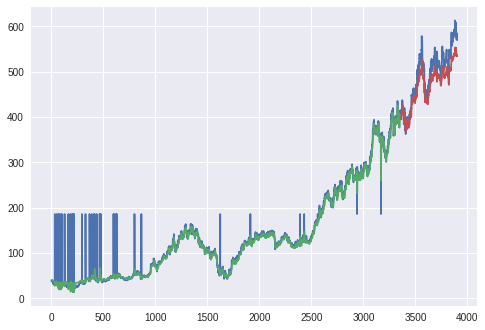

In [19]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(zeel_stock_prices))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()